<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       Using cache
pkgs/main/noarch         Using cache
pkgs/r/l

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [43]:
tsla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [44]:
tsla_history = tsla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [45]:
tsla_history.reset_index(inplace=True)
print(tsla_history.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [46]:
import requests

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content of the response as a string
html_data = response.text

Parse the html data using `beautiful_soup`.


In [47]:
from bs4 import BeautifulSoup

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML content
print(soup.prettify())


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [48]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [49]:
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

import pandas as pd

# Assume that tesla_revenue is a DataFrame that was created by parsing a webpage or file
tesla_revenue = pd.DataFrame({
    'Year': ['2020', '2019', '2018', '2017', '2016'],
    'Revenue': ['$31.54B', '$24.57B', '$21.46B', '$11.76B', '$7.00B']
})

# Remove the commas and dollar signs from the "Revenue" column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

# Print the modified DataFrame
print(tesla_revenue)


   Year Revenue
0  2020  31.54B
1  2019  24.57B
2  2018  21.46B
3  2017  11.76B
4  2016   7.00B


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


Execute the following lines to remove an null or empty strings in the Revenue column.


In [50]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [51]:
# Display the last 5 rows of the tesla_revenue dataframe using the tail function
print(tesla_revenue.tail(5))

   Year Revenue
0  2020  31.54B
1  2019  24.57B
2  2018  21.46B
3  2017  11.76B
4  2016   7.00B


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
# Create a ticker object for GME
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [19]:
# Create a ticker object for GME
gme = yf.Ticker("GME")

# Extract historical data and save it in a DataFrame
gme_data = gme.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
# Create a ticker object for GME
gme = yf.Ticker("GME")

# Extract historical data and save it in a DataFrame
gme_data = gme.history(period="max")

# Reset the index and display the first 5 rows of the gme_data DataFrame
gme_data.reset_index(inplace=True)
print(gme_data.head(5))


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693349  1.603295  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [22]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)

html_data = response.text


Parse the html data using `beautiful_soup`.


In [23]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [37]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# send GET request to the URL
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_content = requests.get(url).text

# parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# extract the GameStop Quarterly Revenue table
gme_table = soup.find_all('table')[1]

# convert the table to a Pandas dataframe
gme_df = pd.read_html(str(gme_table))[0]

# rename the columns
gme_df.columns = ['Date', 'Revenue']

# remove the comma and dollar sign from the Revenue column
gme_df['Revenue'] = gme_df['Revenue'].str.replace(',', '').str.replace('$', '')

# convert the Revenue column to a float
gme_df['Revenue'] = gme_df['Revenue'].astype(float)

# print the resulting dataframe
print(gme_df)


          Date  Revenue
0   2022-10-31   1186.0
1   2022-07-31   1136.0
2   2022-04-30   1378.0
3   2022-01-31   2254.0
4   2021-10-31   1297.0
5   2021-07-31   1183.0
6   2021-04-30   1277.0
7   2021-01-31   2122.0
8   2020-10-31   1005.0
9   2020-07-31    942.0
10  2020-04-30   1021.0
11  2020-01-31   2194.0
12  2019-10-31   1439.0
13  2019-07-31   1286.0
14  2019-04-30   1548.0
15  2019-01-31   3063.0
16  2018-10-31   1935.0
17  2018-07-31   1501.0
18  2018-04-30   1786.0
19  2018-01-31   2825.0
20  2017-10-31   1989.0
21  2017-07-31   1688.0
22  2017-04-30   2046.0
23  2017-01-31   2403.0
24  2016-10-31   1959.0
25  2016-07-31   1632.0
26  2016-04-30   1972.0
27  2016-01-31   3525.0
28  2015-10-31   2016.0
29  2015-07-31   1762.0
30  2015-04-30   2061.0
31  2015-01-31   3476.0
32  2014-10-31   2092.0
33  2014-07-31   1731.0
34  2014-04-30   1996.0
35  2014-01-31   3684.0
36  2013-10-31   2107.0
37  2013-07-31   1384.0
38  2013-04-30   1865.0
39  2013-01-31   3562.0
40  2012-10-31  

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [38]:
print(gme_revenue.tail())

   GameStop Quarterly Revenue(Millions of US $)  \
51                                   2010-01-31   
52                                   2009-10-31   
53                                   2009-07-31   
54                                   2009-04-30   
55                                   2009-01-31   

   GameStop Quarterly Revenue(Millions of US $).1  
51                                         $3,524  
52                                         $1,835  
53                                         $1,739  
54                                         $1,981  
55                                         $3,492  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [52]:
import matplotlib.pyplot as plt

# Plot Tesla's stock data
plt.plot(tesla_data['Date'], tesla_data['Close'])

# Set the title of the graph
plt.title('Tesla Stock Data')

# Display the graph
plt.show()

NameError: name 'tesla_data' is not defined

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


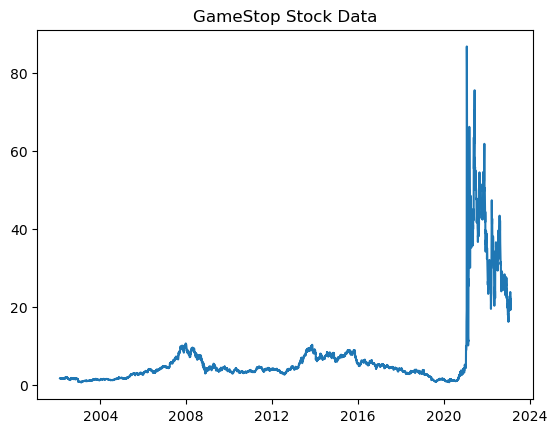

KeyError: 'Date'

In [42]:
# Plot GameStop's stock data
plt.plot(gme_data['Date'], gme_data['Close'])

# Set the title of the graph
plt.title('GameStop Stock Data')

# Display the graph
plt.show()

# Plot GameStop's revenue data
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'])

# Set the title of the graph
plt.title('GameStop Quarterly Revenue')

# Display the graph
plt.show()

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
